In [1]:
import copy
import matplotlib
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
from matplotlib.pyplot import imshow
from numpy.random import randn
from scipy import stats
import pandas as pd
import time
from scipy.stats import multivariate_t
import random
from sklearn.decomposition import PCA
from pca_def import conv_pca,sph_pca2

In [12]:
in_dot = np.zeros((100,6))
in_eig = np.zeros((100,6))
out_dot = np.zeros((100,6))
out_eig = np.zeros((100,6))
for dim in range(6):
    d = 2**(dim + 5)
    alpha1 = 2
    sig2 = np.zeros((d,d))
    for i in range(d):
        for j in range(d):
            sig2[i,j] = 1/(np.abs(i - j) + 1)
    sig11 = np.zeros(d)
    sig11[0:2] = np.array([d**alpha1,d**(0.8*alpha1)])
    sig11 = np.diag(sig11)
    sigma2 = sig11 + sig2
    lam11,vec11 = np.linalg.eigh(sigma2)
    sort2  = lam11.argsort()[::-1]
    lam11 = lam11[sort2]
    vec11 = (vec11.T[sort2]).T
    for it in range(100):
        X = np.random.multivariate_normal(np.zeros(d),sigma2,20).T
        x2 = np.random.multivariate_normal(np.ones(d),2*d * np.identity(d),2).T
        X_out = np.concatenate([X,x2],axis = 1)
        d,n = np.shape(X)

        lam_s,vec_s_t,vec_s = sph_pca2(X)
        lam_so,vec_so_t,vec_so = sph_pca2(X_out)
        Z1 = np.diag(lam11**(-1/2)) @ vec11.T @ X
        u = np.zeros(n)
        for i in range(n):
            u[i] = Z1[0,i]/np.sqrt(Z1[0,i]**2+ lam11[1]/lam11[0] * Z1[1,i]**2 )
        u_out = np.zeros(n + 2)
        u_out[:n] = u
        u_out[n:] = np.array([1,1])
        u /= np.linalg.norm(u)
        u_out /= np.linalg.norm(u_out)
        in_dot[it,dim] = np.dot(u,vec_s[:,0])
        out_dot[it,dim] = np.dot(u_out,vec_so[:,0])
        lame = 0
        for p in range(n):
            lame += (Z1[0,p]**2)/(Z1[0,p]**2 + (lam11[1]/lam11[0]) * Z1[1,p]**2)
        lame /= n
        print('finish' + str(dim) +' ' +  str(it))

finish0 0
finish0 1
finish0 2
finish0 3
finish0 4
finish0 5
finish0 6
finish0 7
finish0 8
finish0 9
finish0 10
finish0 11
finish0 12
finish0 13
finish0 14
finish0 15
finish0 16
finish0 17
finish0 18
finish0 19
finish0 20
finish0 21
finish0 22
finish0 23
finish0 24
finish0 25
finish0 26
finish0 27
finish0 28
finish0 29
finish0 30
finish0 31
finish0 32
finish0 33
finish0 34
finish0 35
finish0 36
finish0 37
finish0 38
finish0 39
finish0 40
finish0 41
finish0 42
finish0 43
finish0 44
finish0 45
finish0 46
finish0 47
finish0 48
finish0 49
finish0 50
finish0 51
finish0 52
finish0 53
finish0 54
finish0 55
finish0 56
finish0 57
finish0 58
finish0 59
finish0 60
finish0 61
finish0 62
finish0 63
finish0 64
finish0 65
finish0 66
finish0 67
finish0 68
finish0 69
finish0 70
finish0 71
finish0 72
finish0 73
finish0 74
finish0 75
finish0 76
finish0 77
finish0 78
finish0 79
finish0 80
finish0 81
finish0 82
finish0 83
finish0 84
finish0 85
finish0 86
finish0 87
finish0 88
finish0 89
finish0 90
finish0 9

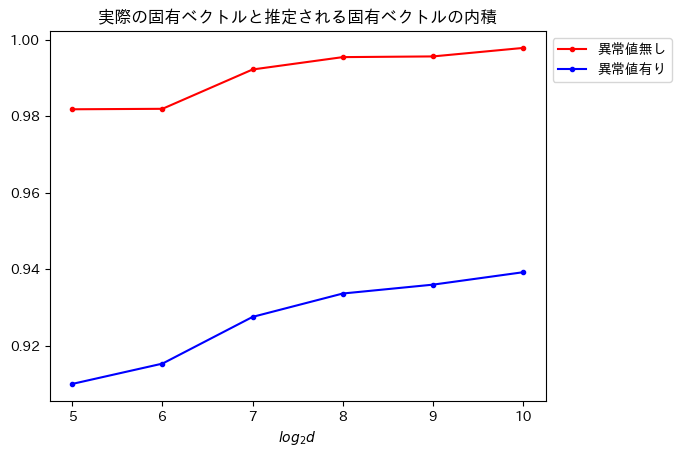

In [13]:
plt.plot(np.arange(5,11),(np.abs(in_dot)).mean(axis = 0),c = "r",marker = ".",label = "異常値無し")
plt.plot(np.arange(5,11),(np.abs(out_dot)).mean(axis = 0),c = "b",marker = ".",label = "異常値有り")
plt.xlabel("$log_2 d$")
plt.title("実際の固有ベクトルと推定される固有ベクトルの内積")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()